<a href="https://colab.research.google.com/github/saimathura/deeplearning-MDSC302/blob/main/22233_Assigment_4_MDSC_302_auto_encoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saimathurakrishnan","key":"93f1782054d1d824aebb7eace9b87a9b"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                 title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/global-youtube-statistics-2023     Global YouTube Statistics 2023                  60KB  2023-07-28 15:36:38          10997        371  1.0              
nelgiriyewithana/top-spotify-songs-2023             Most Streamed Spotify Songs 2023                47KB  2023-08-26 11:04:57           1251         57  1.0              
ravindrasinghrana/employeedataset                   Employee Dataset(All in One)                   520KB  2023-08-13 08:06:29           1228         34  1.0              
arjunajn/netflix-watch-log                          Netflix Watch Log                              295KB  2023-08-22 08:23:45            897     

In [6]:
!kaggle competitions download -c Kannada-MNIST

 89% 11.0M/12.4M [00:00<00:00, 19.7MB/s]
100% 12.4M/12.4M [00:00<00:00, 14.2MB/s]


In [7]:
! mkdir train

In [8]:
! unzip Kannada-MNIST.zip -d train

Archive:  Kannada-MNIST.zip
  inflating: train/Dig-MNIST.csv     
  inflating: train/sample_submission.csv  
  inflating: train/test.csv          
  inflating: train/train.csv         


In [9]:
import os
import pandas as pd
from torchvision.io import read_image
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
class Kmnist(Dataset):
    def __init__(self, df, transform=None, target_transform=None):
        self.img_labels = df.iloc[:,0]
        # self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        self.df = df

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        #img_path = os.path.join( self.img_labels.iloc[idx, 0])
        image = (self.df.iloc[idx,1:].values)
        image = torch.tensor(image)
        label = self.img_labels.iloc[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [11]:
t_data = pd.read_csv('/content/train/train.csv')

# defining functions to find variance - covariance matrix

In [14]:
import numpy as np

In [ ]:
# def v_cv(x):
#     one = np.ones((x.shape[0],1))
#     print(one.shape)
#     i = np.identity(x.shape[1])
#     one_mat = one @ np.transpose(one)
#     print(one_mat,one_mat.shape)
#     one_mat = (1/x.shape[0])*one_mat
#     print(one_mat,one_mat.shape)
#     print(np.transpose(x).shape,(i - one_mat).shape,x.shape)
#     vc_mat = np.transpose(x) @ (i - one_mat) @ x
#     vc_mat = (1/(x.shape[0]-1)) * vc_mat

#     return vc_mat

In [ ]:
# v_cv(t_mat)

In [22]:
eig_val,eig_vec = np.linalg.eig(np.array((t_data.drop(t_data.columns[0],axis = 1)).cov()))

In [43]:
print(eig_vec[2])

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.

In [32]:
print(eig_val)

[(194165.70395065786+0j), (135685.66387624815+0j), (108787.49732037348+0j), (89093.04148178102+0j), (83925.8958696194+0j), (67765.96930267608+0j), (59356.450104055264+0j), (50946.69745884015+0j), (49591.457891466045+0j), (41959.696192331416+0j), (39425.82519612779+0j), (35107.434362768574+0j), (33478.30899280245+0j), (29445.268564938753+0j), (28762.411246649353+0j), (27390.747899429418+0j), (26164.942329439+0j), (25780.250587595016+0j), (24833.753100646212+0j), (24548.62068490243+0j), (22986.9255280189+0j), (22389.88084229524+0j), (20876.413619251332+0j), (20484.15750234619+0j), (19868.21015058615+0j), (19466.830360643737+0j), (18955.94958928055+0j), (17950.072247495995+0j), (17499.455549885442+0j), (17014.952861962967+0j), (16319.909535890956+0j), (16258.518238214974+0j), (15987.518468623839+0j), (15532.551925187658+0j), (15008.400872282646+0j), (14600.822355371769+0j), (14065.783205558424+0j), (13771.7612155243+0j), (13332.984467313965+0j), (12885.288700605237+0j), (12544.24458638792

In [23]:
print(len(list(eig_val)))

784


In [24]:
eig_val = list(eig_val)

In [25]:
eig_val_caintrib = [i/sum(eig_val) for i in eig_val]

In [28]:
x = [i for i in range(len(eig_val))]

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


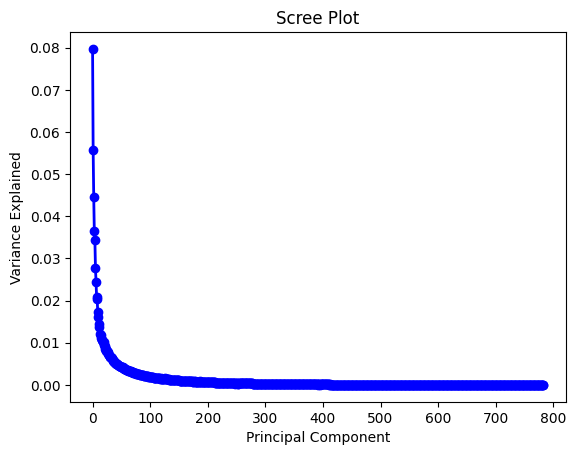

In [30]:
import matplotlib.pyplot as plt

plt.plot(x, eig_val_caintrib, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

## finding the maxium contributing eigenvalues (first K)

In [31]:
sum = 0
count = 0
for i in eig_val_caintrib:
    if sum > 0.85:
        break
    sum = sum+i
    count = count + 1
print(f"The no fo eigenvalues that contribute {sum} sum is {count}")

The no fo eigenvalues that contribute (0.8514765183226758+0j) sum is 121


In [33]:
from sklearn.preprocessing import StandardScaler
#define scaler
scaler = StandardScaler()

#create copy of DataFrame
scaled_df=t_data.drop(t_data.columns[0],axis = 1).copy()

#created scaled version of DataFrame
scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)

In [34]:
from sklearn.decomposition import PCA

#define PCA model to use
pca = PCA(n_components=784)

#fit PCA model to data
pca_fit = pca.fit(scaled_df)

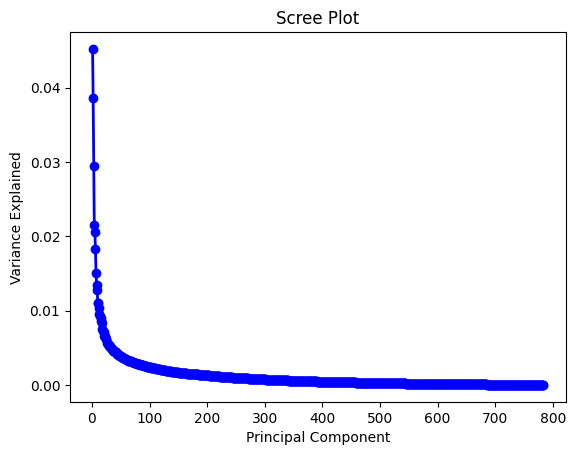

In [35]:

import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [36]:
# Determine the number of components that explain a certain percentage of variance
desired_variance = 0.85  # You can adjust this value as needed
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
best_n_components = np.argmax(cumulative_variance >= desired_variance) + 1

print(f"Number of components to explain {desired_variance*100}% variance: {best_n_components}")

Number of components to explain 85.0% variance: 262


In [37]:
#define PCA model to use
pca = PCA(n_components=121)

#fit PCA model to data
pca_fit = pca.fit(scaled_df)

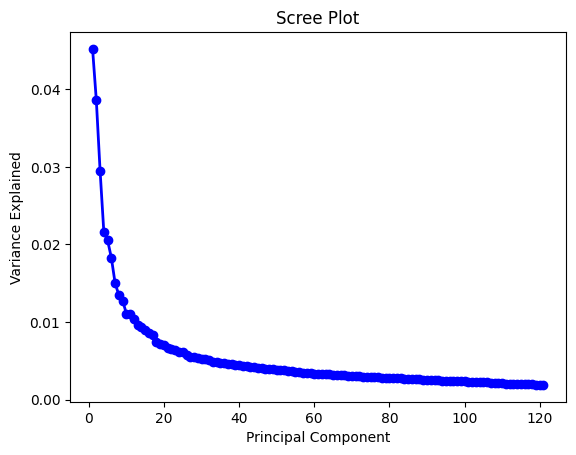

In [38]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

## Projecting the data

In [65]:
actual_data = t_data.drop(t_data.columns[0],axis = 1)

In [66]:
actual_data.shape

(60000, 784)

In [67]:
projection_matrix = pd.DataFrame(eig_vec[0:121])

In [68]:
projection_matrix = projection_matrix.T

In [69]:
projection_matrix.

(784, 121)

In [70]:
projection_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
0,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,-0.000012+0.000000j,-0.000049+0.000000j,-0.000048+0.000000j,-0.000096+0.000000j,-0.000150+0.000000j,...,-0.000025+0.000000j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,-5.746927e-07+0.000000e+00j,-0.000138+0.000000j,-0.001555+0.000000j,-0.005661+0.000000j,-0.016967+0.000000j
1,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,-0.000019+0.000000j,-0.000043+0.000000j,-0.000067+0.000000j,-0.000171+0.000000j,-0.000211+0.000000j,...,0.000035+0.000000j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,-1.160619e-05+0.000000e+00j,-0.000003+0.000000j,0.000251+0.000000j,0.001142+0.000000j,0.003994+0.000000j
2,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,-0.000018+0.000000j,-0.000088+0.000000j,-0.000124+0.000000j,-0.000232+0.000000j,-0.000403+0.000000j,...,0.000013+0.000000j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,-2.200506e-05+0.000000e+00j,-0.000111+0.000000j,-0.001411+0.000000j,-0.005803+0.000000j,-0.018019+0.000000j
3,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.000022+0.000000j,0.000069+0.000000j,0.000011+0.000000j,0.000070+0.000000j,0.000139+0.000000j,...,-0.000016+0.000000j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,-1.090998e-05+0.000000e+00j,0.000003+0.000000j,0.000233+0.000000j,0.000605+0.000000j,-0.000368+0.000000j
4,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,-0.000022+0.000000j,-0.000101+0.000000j,-0.000163+0.000000j,-0.000271+0.000000j,-0.000519+0.000000j,...,0.000026+0.000000j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,-8.332826e-06+0.000000e+00j,-0.000027+0.000000j,-0.000704+0.000000j,-0.003455+0.000000j,-0.011757+0.000000j


In [74]:
projection = actual_data.dot(projection_matrix.astype(actual_data))

ValueError: ignored

# Building the Net

In [79]:
from torch.utils.data import random_split

In [80]:
train_size = int(0.9 * (len(train_data)))

In [81]:
val_size = len(train_data) - train_size

In [82]:
train_set , val_set = random_split(train_data, [train_size, val_size])

In [83]:
train_set.__len__()

54000

In [84]:
val_set.__len__()


6000

In [85]:
tt_data = pd.read_csv('/content/train/train.csv')

In [86]:
test_data = Kmnist(tt_data)

In [87]:
from torch.utils.data import DataLoader

In [88]:
train_dataloader = DataLoader(train_set,batch_size = 64,shuffle = True)
val_dataloader = DataLoader(val_set,batch_size = 64,shuffle = True)
test_dataloader = DataLoader(test_data,batch_size = 64,shuffle = True)

In [89]:
train_features,train_labels = next(iter(train_dataloader))

Feature batch shape: torch.Size([64, 784])
Labels batch shape: torch.Size([64])


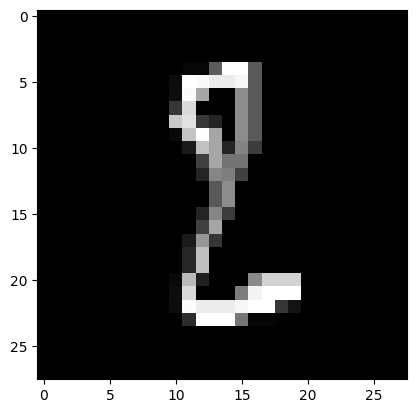

Label: 7


In [90]:
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].reshape(28,28).squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

#Building NN

In [91]:
from torch import nn

In [92]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [102]:
import torch.nn.functional as F

# creating the auto encoders

# our auto encoder model

In [144]:
class net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28,1000)#just a random Neural Network with 6 Hidden Layers
        self.fc2 = nn.Linear(1000,500)
        self.fc3 = nn.Linear(500,250)
        self.fc4 = nn.Linear(250,112)
        self.fc5 = nn.Linear(112,250)
        self.fc6 = nn.Linear(250,500)
        self.fc7 = nn.Linear(500,1000)
        self.fc8 = nn.Linear(1000,784)

    def forward(self,x):
        x = F.relu(self.fc1(x.float()))# using a common Activation Function
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        output = F.relu(self.fc8(x))
        return output


In [145]:
model = net()# loading THe Model

In [146]:
model.cuda()

net(
  (fc1): Linear(in_features=784, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=250, bias=True)
  (fc4): Linear(in_features=250, out_features=112, bias=True)
  (fc5): Linear(in_features=112, out_features=250, bias=True)
  (fc6): Linear(in_features=250, out_features=500, bias=True)
  (fc7): Linear(in_features=500, out_features=1000, bias=True)
  (fc8): Linear(in_features=1000, out_features=784, bias=True)
)

In [148]:
device = torch.device("cuda:0")
model.to(device)

net(
  (fc1): Linear(in_features=784, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=250, bias=True)
  (fc4): Linear(in_features=250, out_features=112, bias=True)
  (fc5): Linear(in_features=112, out_features=250, bias=True)
  (fc6): Linear(in_features=250, out_features=500, bias=True)
  (fc7): Linear(in_features=500, out_features=1000, bias=True)
  (fc8): Linear(in_features=1000, out_features=784, bias=True)
)

In [149]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)

In [150]:
epochs = 10

In [151]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []# for plotting

In [152]:
for e in range(epochs):
    train_loss = 0.0
    val_loss = 0.0
    train_correct = 0
    train_total = 0
    val_correct = 0
    val_total = 0
    model.train()  # Set the model to training mode

    # Training loop
    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, images.float())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        #_, predicted = torch.max(outputs, 1)
        #train_total += labels.size(0)
        #train_correct += (predicted == labels).sum().item()

    # Validation loop
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        for val_images, val_labels in val_dataloader:  # Assuming you have a DataLoader named 'val_loader'
            val_images, val_labels = val_images.to(device), val_labels.to(device)
            val_outputs = model(val_images)
            val_loss += criterion(val_outputs, val_images.float()).item()

        val_loss = val_loss/len(val_dataloader)




    print(f'Epoch [{e+1}/{epochs}] Train Loss: {loss:.4f}, Val Loss: {val_loss:.4f}')

print("Training finished")

Epoch [1/10] Train Loss: 2182.8538, Val Loss: 2067.9765
Epoch [2/10] Train Loss: 1672.6942, Val Loss: 1741.4598
Epoch [3/10] Train Loss: 1740.0687, Val Loss: 1605.4638
Epoch [4/10] Train Loss: 1458.9591, Val Loss: 1515.5006
Epoch [5/10] Train Loss: 1565.6210, Val Loss: 1407.9195
Epoch [6/10] Train Loss: 1429.6692, Val Loss: 1323.5849
Epoch [7/10] Train Loss: 1353.6085, Val Loss: 1267.3127
Epoch [8/10] Train Loss: 1193.4640, Val Loss: 1223.2844
Epoch [9/10] Train Loss: 997.5827, Val Loss: 1187.2604
Epoch [10/10] Train Loss: 1064.2014, Val Loss: 1153.6601
Training finished


In [153]:

model.eval()  # Set the model to evaluation mode
test_loss = 0.0
test_correct = 0
test_total = 0

with torch.no_grad():
    for test_images, test_labels in test_dataloader:  # Assuming you have a DataLoader named 'test_loader'
        test_images, test_labels = test_images.to(device), test_labels.to(device)
        test_outputs = model(test_images)
        test_loss += criterion(test_outputs, test_images.float()).item()
        _, test_predicted = torch.max(test_outputs, 1)
        test_total += test_labels.size(0)
        test_correct += (test_predicted == test_labels).sum().item()

average_test_loss = test_loss / len(test_dataloader)
test_accuracy = test_correct / test_total * 100

print(f'Test Loss: {average_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

Test Loss: 1136.4404, Test Accuracy: 0.00%


Feature batch shape: torch.Size([64, 784])
Labels batch shape: torch.Size([64])


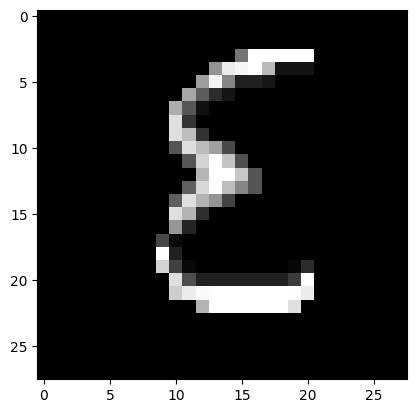

Label: 9


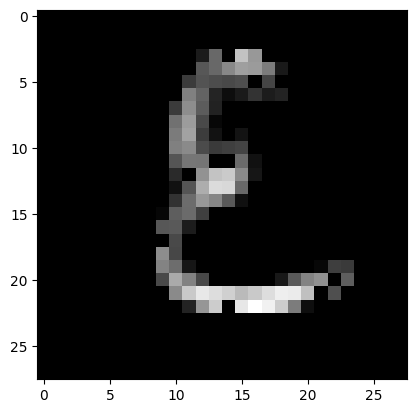

Label: 9


In [154]:
for test_images, test_labels in test_dataloader:  # Assuming you have a DataLoader named 'test_loader'

        print(f"Feature batch shape: {test_images.size()}")
        print(f"Labels batch shape: {test_labels.size()}")
        img = test_images[0].reshape(28,28).squeeze()
        label = test_labels[0]
        plt.imshow(img, cmap="gray")
        plt.show()
        print(f"Label: {label}")
        test_images = test_images.to(device)
        test_outputs = model(test_images)
        test_outputs = test_outputs.cpu()
        test_outputs = test_outputs.detach().numpy()
        #print(f"Feature batch shape: {test_outputs.size()}")
        #print(f"Labels batch shape: {test_labels.size()}")
        img = test_outputs[0].reshape(28,28).squeeze()
        label = test_labels[0]
        plt.imshow(img, cmap="gray")
        plt.show()
        print(f"Label: {label}")
        break